In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [7]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.1,random_state=0)
X


array([[ 2.04271531,  0.51812416],
       [ 1.72033708, -0.13233804],
       [-0.26386729,  0.76382643],
       ..., 
       [ 0.33823662, -0.43099924],
       [ 0.1269428 ,  0.09966251],
       [ 0.54241537, -0.47450809]])

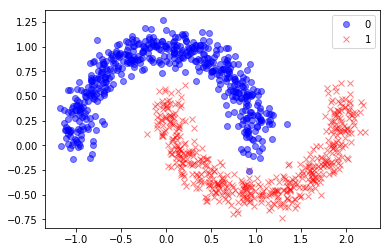

In [4]:
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)
plt.legend(['0','1'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from keras.models import Sequential

Using TensorFlow backend.


In [11]:
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [12]:
#Building deep model for smaple data set 

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)


In [15]:
model.evaluate(X_test, y_test)


 32/300 [==>...........................] - ETA: 0s

[0.0043568988039623946, 0.9966666666666667]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [17]:

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

 32/300 [==>...........................] - ETA: 0sThe Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	0.997


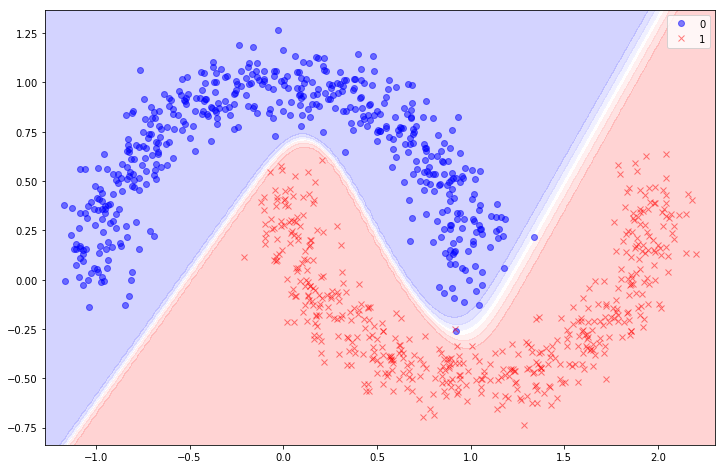

In [19]:

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)